In [57]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture as GMM
from sklearn import preprocessing
import pickle
import os
# import sounddevice as sd
# import soundfile as sf

In [58]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls "/content/drive/My Drive/Projects/pygender"
# !ls "/content/drive/My Drive/Projects/pygender/train_data/youtube/female"
# !pip install PortAudio
x, sr = librosa.load('drive/My Drive/Projects/pygender/train_data/youtube/female/female4.wav')
print(x.shape)
print(sr)

(1323719,)
22050


In [59]:
# Extracting MFCC of a audio file
def get_MFCC(sr,audio):
    # features = librosa.feature.mfcc(y=audio, sr=sr)
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = False)
    features = preprocessing.scale(features)
    
    return features

In [60]:
# Extracting features of the training set
def get_features(source):
    files = [os.path.join(source,f) for f in os.listdir(source) if f.endswith('.wav')]
    # return files
    # Split files
    len_train = int(len(files)*0.8)
    train_files = files[:len_train]
    test_files = files[len_train:]
    
    # Train features
    features_train = []
    for f in train_files:
        # audio, sr = librosa.load(f)
        sr, audio = read(f)
        vector = get_MFCC(sr,audio)
        if len(features_train) == 0:
            features_train = vector
        else:
            features_train = np.vstack((features_train, vector))
            
    # Test features  
    features_test = []
    for f in test_files:
    #     sr, audio = librosa.load(f)
        sr, audio = read(f)
        vector = get_MFCC(sr,audio)
        if len(features_test) == 0:
            features_test = vector
        else:
            features_test = np.vstack((features_test, vector))
            
    return features_train, features_test

In [62]:
# get_features('drive/My Drive/Projects/pygender/test_data/AudioSet/female_clips')
# librosa.load('drive/My Drive/Projects/pygender/test_data/AudioSet/female_clips/03FIC_TqMQg.wav')
source = "drive/My Drive/Projects/pygender/test_data/AudioSet/male_clips"
# get_features(source)
features_train_male, features_test_male = get_features(source)
gmm_male = GMM(n_components = 8, max_iter = 200, covariance_type = 'diag', n_init = 3)
gmm_male.fit(features_train_male)


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=200,
                means_init=None, n_components=8, n_init=3, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [63]:
source = "drive/My Drive/Projects/pygender/test_data/AudioSet/female_clips"
features_train_female, features_test_female =  get_features(source)
gmm_female = GMM(n_components = 8, max_iter=200, covariance_type='diag', n_init = 3)
gmm_female.fit(features_train_female)


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=200,
                means_init=None, n_components=8, n_init=3, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

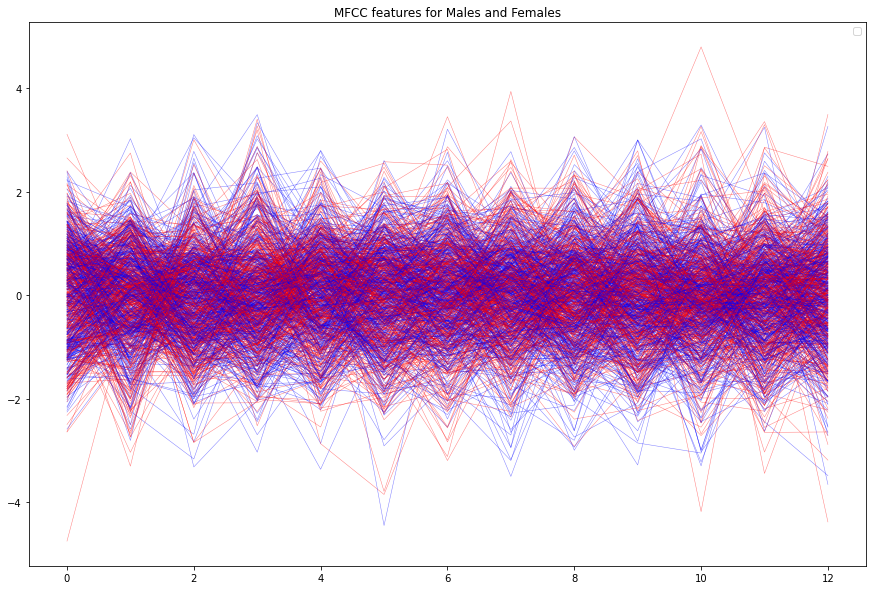

In [65]:
plt.figure(figsize=(15,10))
for i in range(1, 430000, 1000):
    plt.plot(features_train_male[i], c='b', linewidth=0.5, alpha=0.5)
    plt.plot(features_train_female[i], c='r', linewidth=0.5, alpha=0.5)
# plt.plot(features_male[i+1], c='b', label="Male", linewidth=0.5, alpha=0.5)
# plt.plot(features_female[i+1], c='r', label="Female", linewidth=0.5, alpha=0.5)
plt.legend()
plt.title("MFCC features for Males and Females")
plt.show()


In [66]:
output = []

for f in features_test_male:

    log_likelihood_male = np.array(gmm_male.score([f])).sum()
    log_likelihood_female = np.array(gmm_female.score([f])).sum()
    
    if log_likelihood_male > log_likelihood_female:
        output.append(0)
    else:
        output.append(1)

accuracy_male = (1 - sum(output)/len(output))
accuracy_male

0.6355939934679877